# TSF GRIP Task 1


Siddhesh Yadav

Task:Prediction using Supervised ML

Predicting the percentage of a student based on the number of study hours.

Importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Fetching Data

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting the distribution of scores


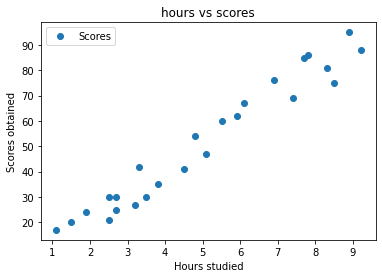

In [8]:
df.plot(x='Hours',y='Scores',style = 'o')
plt.title("hours vs scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores obtained")
plt.show()

From the graph above we can see that the no. of hours studied and scores obtained are positively correlated.

Preparing the data

In [25]:
H = df.iloc[:, :-1].values  
S = df.iloc[:, 1].values

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [26]:
from sklearn.model_selection import train_test_split  
H_train, H_test, S_train, S_test = train_test_split(H, S, test_size=0.2, random_state=0) 

#Training the algorithm

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(H_train,S_train)

LinearRegression()

In [53]:
regressor.score(H_train,S_train)


0.9515510725211552

Plotting the regression line

In [30]:
line = regressor.coef_*H+regressor.intercept_

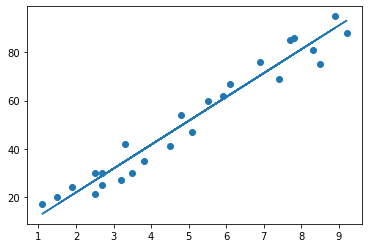

In [31]:
plt.scatter(H,S)
plt.plot(H,line)
plt.show()

Making predictions

In [33]:
print(H_test)
S_pred = regressor.predict(H_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing actual vs predicted

In [36]:
df2 = pd.DataFrame({'Actual':S_test,'Predicted':S_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of hours = {}".format(hours))
print("predicted score = {}".format(prediction[0]))

No of hours = 9.25
predicted score = 93.69173248737539


Evaluating the model

In [50]:
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(S_test,S_pred))
print("MSE:",metrics.mean_squared_error(S_test,S_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(S_test,S_pred)))

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE 4.647447612100373
